In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset
data =  pd.read_excel(r"C:\Users\User\Downloads\Lab Session Data.xlsx", sheet_name="marketing_campaign" )
print(data.head())

#separate features and class labels
#x = data.drop(columns = ["Response"])
#y = data["Response"]

#convert to numpy arrays
#x = x.values
#y = y.values

numeric_data = data.select_dtypes(include=[np.number])

X = numeric_data.drop(columns=["Response"]).values
y = numeric_data["Response"].values





     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

           Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0  2012-04-09 00:00:00       58       635  ...                  7   
1  2014-08-03 00:00:00       38        11  ...                  5   
2           21-08-2013       26       426  ...                  4   
3  2014-10-02 00:00:00       26        11  ...                  6   
4           19-01-2014       94       173  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0            

A1. vector operations (Dot Product and Euclidean Norm)

In [6]:
#dot product function
def dot_prod(a,b):
    final_ans = 0
    for i in range(len(a)):
        final_ans = final_ans + a[i]*b[i]
    return final_ans

#euclidean norm function
def eucli_norm(a):
    result = 0
    for i in range(len(a)):
        result = result + a[i] * a[i]
    return result ** 0.5

#main
a = X[0]
b = X[1]

print("Dot Product:", dot_prod(a, b))
print("Dot Product (NumPy):", np.dot(a, b))

print("Euclidean Norm:", eucli_norm(a))
print("Euclidean Norm (NumPy):", np.linalg.norm(a))


    

Dot Product: 2710194336.0
Dot Product (NumPy): 2710194336.0
Euclidean Norm: 58439.10812974476
Euclidean Norm (NumPy): 58439.10812974476


A2 Mean, Standard Deviation 

In [7]:
#separate two classes 
class0 = X[y==0]
class1 = X[y == 1]

#mean vector(class centroid)
def class_centroid(class_data):
    return np.mean(class_data, axis=0)
    
#intra class spread(standard deviation)
def class_spread(class_data):
    return np.std(class_data, axis=0)

#interclass distance(Euclidean)
def interclass_dist(sentroid1 , centroid2):
    return np.linalg.norm(centroid1 - centroid2)

#main
centroid0 = class_centroid(class0)
centroid1 = class_centroid(class1)

spread0 = class_spread(class0)
spread1 = class_spread(class1)

distance = interclass_dist(centroid0, centroid1)

print("Centroid of Class 0:")
print(centroid0)

print("\nCentroid of Class 1:")
print(centroid1)

print("\nIntraclass Spread of Class 0:")
print(spread0)

print("\nIntraclass Spread of Class 1:")
print(spread1)

print("\nInterclass Distance:")
print(distance)

    

    
    
    
      


    
    

NameError: name 'y' is not defined

A3 HISTROGRAM MEAN AND VARIANCE

mean:  5592.159821428571
Variance:  10536109.703921402


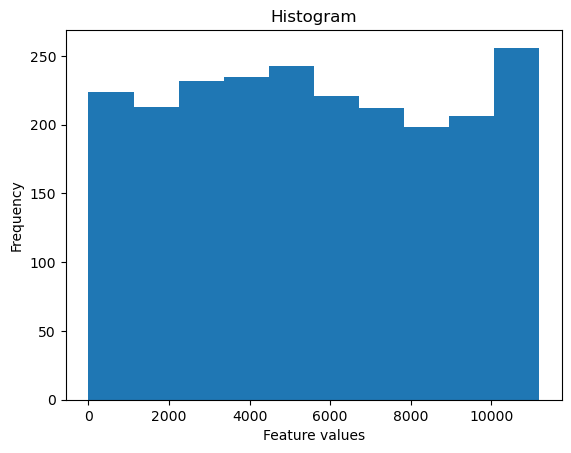

In [27]:
#select one feature
feature = X[:,0]

#Histogram using buckets
hist, bins = np.histogram(feature)

plt.hist(feature, bins = 10)
plt.xlabel("Feature values")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show

#mean and variance
total = 0
for i in range(len(feature)):
    total = total + feature[i]

mean = total / len(feature) 

var_sum = 0
for i in range(len(feature)):
    var_sum = var_sum + (feature[i] - mean)** 2

variance = var_sum / len(feature)

print("mean: " , mean)
print("Variance: ",  variance)



    

A4 MINKOWSKI DISTANCE

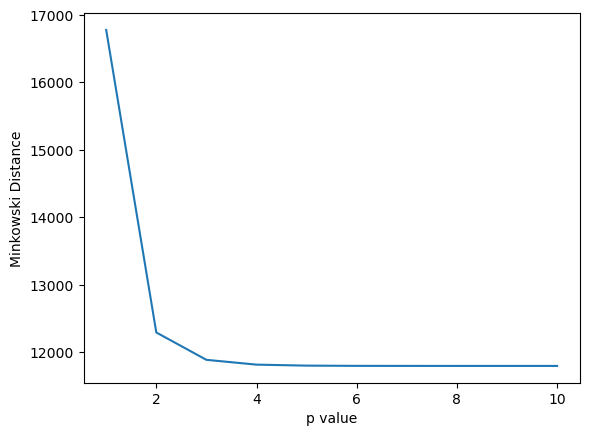

In [13]:

def minkowski_distance(a, b, p):
    total = 0
    for i in range(len(a)):
        total = total + abs(a[i] - b[i]) ** p
    return total ** (1 / p)
a = X[0]
b = X[1]

p_values = []
distances = []

for p in range(1, 11):
    d = minkowski_distance(a, b, p)
    p_values.append(p)
    distances.append(d)

plt.plot(p_values, distances)
plt.xlabel("p value")
plt.ylabel("Minkowski Distance")
plt.show()


A5 COMPARE WITH SCIPY MINKOWSKI

In [14]:
from scipy.spatial.distance import minkowski

distance = minkowski_distance(a,b,p)
scipy_distance = minkowski(a,b,3)

print("Minkowski Distance", distance)
print("Scipy Minkowski distance", scipy_distance)


Minkowski Distance 11794.004031784574
Scipy Minkowski distance 11884.3745540503


A6 TRAIN-TEST SPLIT

In [23]:
#import 
from sklearn.model_selection import train_test_split

#split dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size = 0.3)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))



Training samples: 1568
Testing samples: 672
